<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generating-dataframe" data-toc-modified-id="Generating-dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generating dataframe</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#Fitting-with-MAE-as-loss-funtcion,-like-Linear-regression" data-toc-modified-id="Fitting-with-MAE-as-loss-funtcion,-like-Linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting with MAE as loss funtcion, like Linear regression</a></span></li><li><span><a href="#Sigmoid-fitting" data-toc-modified-id="Sigmoid-fitting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sigmoid fitting</a></span></li><li><span><a href="#Maximum-Likelihood" data-toc-modified-id="Maximum-Likelihood-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Maximum Likelihood</a></span></li></ul></div>

In [173]:
import pandas as pd
import numpy as np
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sympy import *

### Generating dataframe

In [9]:
df=pd.DataFrame({'x':[0.1,1.3,2,2.9,3.6,5.1], 'y':[0,0,1,0,1,1]})

#### Plotting

In [174]:

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, m * x + b)
    plt.scatter(df['x'],df['y'])
    plt.xlim(-1,7)
    plt.ylim(-1, 3)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Fitting with MAE as loss funtcion, like Linear regression

In [175]:
m,b =1,1
n=100
df['pred']=m*df['x']+b
nu = 0.1

In [176]:
for i in range(n):

    df['err'] = df['y'] - df['pred']

    df['m_change'] = df['x'] * np.sign(df['err'])
    df['b_change'] = np.sign(df['err'])

    m += nu*df['m_change'].mean()
    b += nu*df['b_change'].mean()

    df['pred'] = m * df['x'] + b

    df['err'] = df['y'] - df['pred']
    df['err_abs'] = np.abs(df['err'])
    if i % 10 == 0:
        print('Mean_error:', df['err_abs'].mean())


Mean_error: 2.275
Mean_error: 0.5035555555555556
Mean_error: 0.3471111111111111
Mean_error: 0.3872222222222224
Mean_error: 0.35888888888888903
Mean_error: 0.3588888888888888
Mean_error: 0.3588888888888886
Mean_error: 0.3588888888888884
Mean_error: 0.3588888888888882
Mean_error: 0.358888888888888


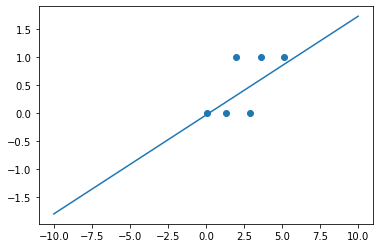

In [177]:
x = np.linspace(-10, 10, num=1000)
plt.plot(x, m * x + b)
plt.scatter(df['x'],df['y'])

Experimenting with Roc-Auc

In [179]:
df['y_pred']=df['pred']>=0.196333

In [180]:
df

,x,y,pred,err,m_change,b_change,err_abs,l,y_pred
0,0.1,0,-0.015667,0.015667,0.1,1.0,0.015667,-0.186521,False
1,1.3,0,0.196333,-0.196333,-1.3,-1.0,0.196333,-0.403782,True
2,2.0,1,0.320000,0.680000,2.0,1.0,0.680000,-0.787843,True
3,2.9,0,0.479000,-0.479000,-2.9,-1.0,0.479000,-0.963857,True
4,3.6,1,0.602667,0.397333,3.6,1.0,0.397333,-0.313117,True
5,5.1,1,0.867667,0.132333,-5.1,-1.0,0.132333,-0.114605,True


In [181]:
lr = LogisticRegression()

In [182]:
lr.fit(df[['x']],df['y'])

LogisticRegression()

In [183]:
lr.predict(df[['x']])

array([0, 0, 0, 1, 1, 1], dtype=int64)

In [184]:
lr.predict_proba(df[['x']])[:,1]

array([0.13704651, 0.28656152, 0.40833095, 0.58055537, 0.70398089,
       0.88352048])

In [193]:
df['lr_pred']=lr.predict_proba(df[['x']])[:,1]

In [194]:
roc_auc_score(df['y'],df['lr_pred'])

0.888888888888889

In [195]:
df[['x','y','pred','lr_pred']]

,x,y,pred,lr_pred
0,0.1,0,-0.015667,0.137047
1,1.3,0,0.196333,0.286562
2,2.0,1,0.320000,0.408331
3,2.9,0,0.479000,0.580555
4,3.6,1,0.602667,0.703981
5,5.1,1,0.867667,0.883520


### Sigmoid fitting

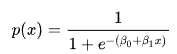

In [196]:


def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, 1/(1+np.exp(-(m*x+b))))
    plt.scatter(df['x'],df['y'])
    plt.xlim(-1,7)
    plt.ylim(0, 1)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

Lets count differentiate

In [197]:
init_printing(use_latex = 'False')

In [198]:
x_ = Symbol('x',real=True)
y_ = Symbol('y',real=True)
m_ = Symbol('m',real=True)
b_ = Symbol('b',real=True)

In [201]:
e1= Abs(y_ - 1/(1+exp(-m_*x_-b_)))
e1
diff(e1,m_)

    -b - m⋅x     ⎛          1      ⎞ 
-x⋅ℯ        ⋅sign⎜y - ─────────────⎟ 
                 ⎜     -b - m⋅x    ⎟ 
                 ⎝    ℯ         + 1⎠ 
─────────────────────────────────────
                          2          
           ⎛ -b - m⋅x    ⎞           
           ⎝ℯ         + 1⎠           

In [202]:
str(diff(e1,m_))

'-x*exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2'

In [203]:
str(diff(e1,b_))

'-exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2'

In [205]:
df=df[['x','y']].copy()

m,b =1,1
n=500
df['pred']=(1/(np.exp(-b - m*df['x']) + 1))
nu = .01

In [206]:
for i in range(n):

    df['err'] = df['y'] - df['pred']

    df['m_change'] =  df['x']*np.exp(-b - m*df['x'])*np.sign(df['y'] - 1/(np.exp(-b - m*df['x']) + 1))/(np.exp(-b - m*df['x']) + 1)**2
   
    df['b_change'] = np.exp(-b - m*df['x'])*np.sign(df['y'] - 1/(np.exp(-b - m*df['x']) + 1))/(np.exp(-b - m*df['x']) + 1)**2

    m += nu*df['m_change'].mean()
    b += nu*df['b_change'].mean()

    df['pred']=(1/(np.exp(-b - m*df['x']) + 1))**2

    df['err'] = df['y'] - df['pred']
    df['err_abs'] = np.abs(df['err'])
    if i % 100 == 0:
        print(df['err_abs'].mean())


0.4110656495489276
0.4086142737639986
0.40608121877419756
0.4034665555885153
0.40077095442166105


In [207]:
roc_auc_score(df['y'],df['pred'])

0.888888888888889

In [208]:
print(m,b)

0.9616188394884606 0.7954772469445639


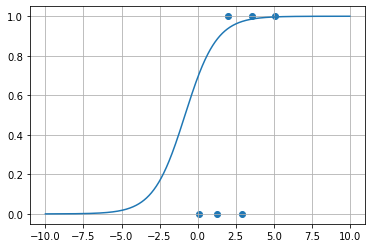

In [209]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(m*x+b))))
plt.scatter(df['x'],df['y'])

In [210]:
#Lets compare with LR from sklearn
lr = LogisticRegression()
lr.fit(df[['x']],df['y'])
df['lr_pred'] = lr.predict_proba(df[['x']])[:,1]

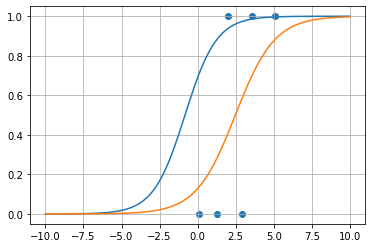

In [211]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(m * x + b))))
plt.plot(x, 1/(1+np.exp(-(lr.coef_[0][0] * x + lr.intercept_[0]))))
plt.scatter(df['x'],df['y'])

In [212]:
roc_auc_score(df['y'],df['pred'])

0.888888888888889

In [213]:
roc_auc_score(df['y'],df['lr_pred'])

0.888888888888889

Roc_auc are the same

### Maximum Likelihood

!We don't change sign to the oppostie, because we need to maximize Likelihood!



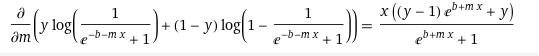

In [214]:
#derivative from maximum likelihood function
(df['x'] *(((df['y'] - 1)* (np.exp(b + m *df['x'])) + df['y'])/(np.exp((b + m *df['x'])) + 1)))

0   -0.070923
1   -1.151151
2    0.123756
3   -2.821671
4    0.050266
5    0.017012
dtype: float64

In [222]:
df=df[['x','y']].copy()

m,b =1,1
n=3000
df['pred']=(1/(np.exp(-b - m*df['x']) + 1))
nu = 0.01

#Wit maximum likelihood
for i in range(n):

    df['err'] = df['y'] - df['pred']

    df['m_change'] =  (df['x'] *(((df['y'] - 1)* (np.exp(b + m *df['x'])) + df['y'])/(np.exp((b + m *df['x'])) + 1)))
   
    df['b_change'] =(df['y'] - 1)* ((np.exp(b + m *df['x'])) + df['y'])/(np.exp((b + m *df['x'])) + 1)

    m += nu*df['m_change'].mean()
    b += nu*df['b_change'].mean()

    df['pred']=(1/(np.exp(-b - m*df['x']) + 1))
  
    df['err'] = df['y'] * (np.log(df['pred']) + (1-df['y'])*np.log(1-df['pred']))
    df['err_abs'] = np.abs(df['err'])
    df['l'] = df['y']*(np.log(df['pred'])) + (1-df['y'])*(np.log(1-df['pred']))
    if i % 100 == 0:
        print(df['l'].sum())
print()        
print(m,b)

-7.726334156280739
-4.832808902670181
-3.989414284561417
-3.7071205387367994
-3.4802691828231787
-3.293283837685814
-3.1410030663721376
-3.017329270049562
-2.9169053540944123
-2.8353438945366047
-2.769129019556996
-2.715465209569107
-2.6721332624670495
-2.6373680668247
-2.60975991132354
-2.5881768001072056
-2.5717040991685103
-2.559597921261448
-2.5512491699041826
-2.5461557615750334
-2.5439010920755956
-2.5441372660494705
-2.5465719659250188
-2.55095811092012
-2.5570856644077438
-2.564775103959744
-2.573872185268342
-2.5842437187107885
-2.5957741430541494
-2.60836273029918

1.7096247837811582 -4.502557857230673


In [225]:
roc_auc_score(df['y'],df['pred'])

0.888888888888889

Lets compare it with model from sklearn

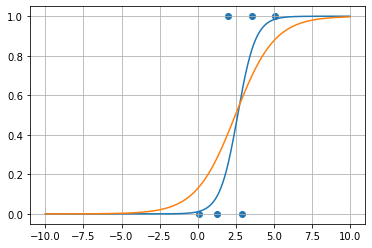

In [226]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(m * x + b))))
plt.plot(x, 1/(1+np.exp(-(0.77324788 * x + -1.91736519))))
plt.scatter(df['x'],df['y'])